In [9]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

### Question 3 : How do pickup patterns change throughout the day? 

pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [10]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean1.csv")
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2015-06-30 23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26054,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26055,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
26056,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [11]:
# Get the information for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26058 entries, 0 to 26057
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  26058 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    26058 non-null  int64  
 3   spd        26058 non-null  float64
 4   vsb        26058 non-null  float64
 5   temp       26058 non-null  float64
 6   dewp       26058 non-null  float64
 7   slp        26058 non-null  float64
 8   pcp01      26058 non-null  float64
 9   pcp06      26058 non-null  float64
 10  pcp24      26058 non-null  float64
 11  sd         26058 non-null  float64
 12  hday       26058 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.6+ MB


In [12]:
# Create columns for hours and months
df['pickup_dt'] = df['pickup_dt'].astype('datetime64')
df['hour'] = df['pickup_dt'].dt.hour
df['month'] = df['pickup_dt'].dt.month
df['month'] = df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'})
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,hour,month
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,January
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,January
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,January
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,January
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2015-06-30 23:00:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,June
26054,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,June
26055,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,June
26056,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,June


In [13]:
# Group the data by month and hour of the day and calculate the average pickups
pickup_monthly_data = df.groupby(['month', 'hour'])['pickups'].mean()
pickup_monthly_data

month  hour
April  0       631.711111
       1       434.877778
       2       278.550000
       3       182.000000
       4       146.650000
                  ...    
May    19      987.822581
       20      943.451613
       21      944.494624
       22      949.677419
       23      935.715054
Name: pickups, Length: 144, dtype: float64

In [14]:
# Check the data for "April" by hour of the day
pickup_hourly_data = pickup_monthly_data["April"]
pickup_hourly_data

hour
0     631.711111
1     434.877778
2     278.550000
3     182.000000
4     146.650000
5     155.927778
6     219.861111
7     333.650000
8     480.883333
9     555.883333
10    500.550000
11    454.905556
12    468.205556
13    463.772222
14    485.894444
15    536.316667
16    598.444444
17    694.088889
18    809.283333
19    876.894444
20    866.216667
21    850.116667
22    833.661111
23    802.350000
Name: pickups, dtype: float64

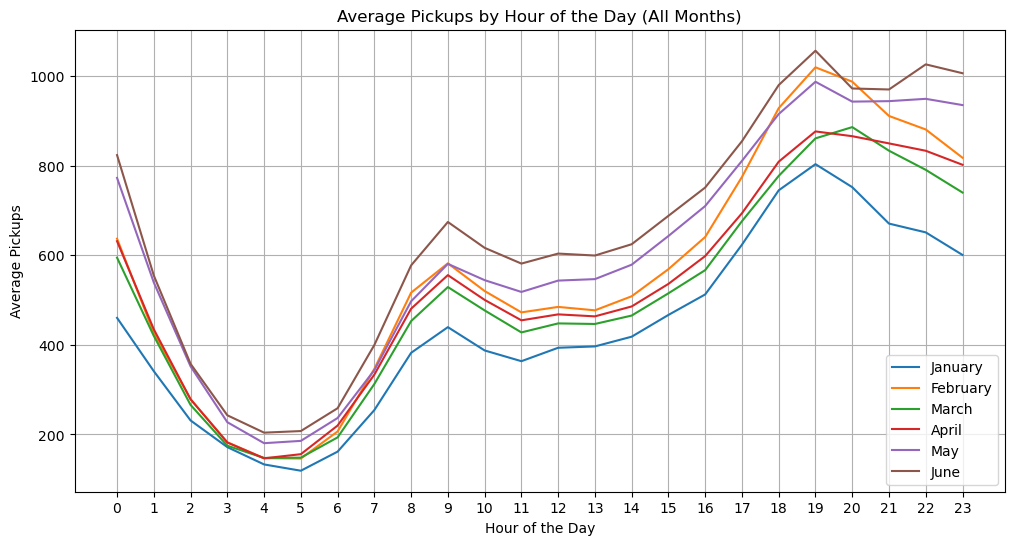

In [15]:
# Group the data by month and hour of the day and calculate the average pickups
pickup_monthly_data = df.groupby(['month', 'hour'])['pickups'].mean()

# Plot pickup patterns for each month and for entire boroughs
months = df['month'].unique()
plt.figure(figsize=(12, 6))
for month in months:
    monthly_data = pickup_monthly_data[month]  
    plt.plot(monthly_data.index, monthly_data, label=f'{month}')

plt.title('Average Pickups by Hour of the Day (All Months)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.legend()
plt.show()

In [16]:
# Group the data by borough, month and hour of the day and calculate the average pickups
borough_data = df.groupby(['borough','month','hour'])['pickups'].mean()
borough_data

borough        month  hour
Bronx          April  0       54.800000
                      1       35.833333
                      2       29.333333
                      3       21.233333
                      4       19.233333
                                ...    
Staten Island  May    19       2.774194
                      20       3.258065
                      21       2.580645
                      22       2.290323
                      23       1.967742
Name: pickups, Length: 864, dtype: float64

In [17]:
# Check the data for "Bronx" on "April" by hour of the day
bronx_data = borough_data["Bronx"]['April']
bronx_data.values

array([54.8       , 35.83333333, 29.33333333, 21.23333333, 19.23333333,
       18.93333333, 28.4       , 44.06666667, 60.2       , 51.93333333,
       43.06666667, 39.83333333, 41.33333333, 43.63333333, 48.56666667,
       58.16666667, 56.7       , 63.86666667, 68.13333333, 61.26666667,
       60.16666667, 68.73333333, 72.5       , 63.96666667])

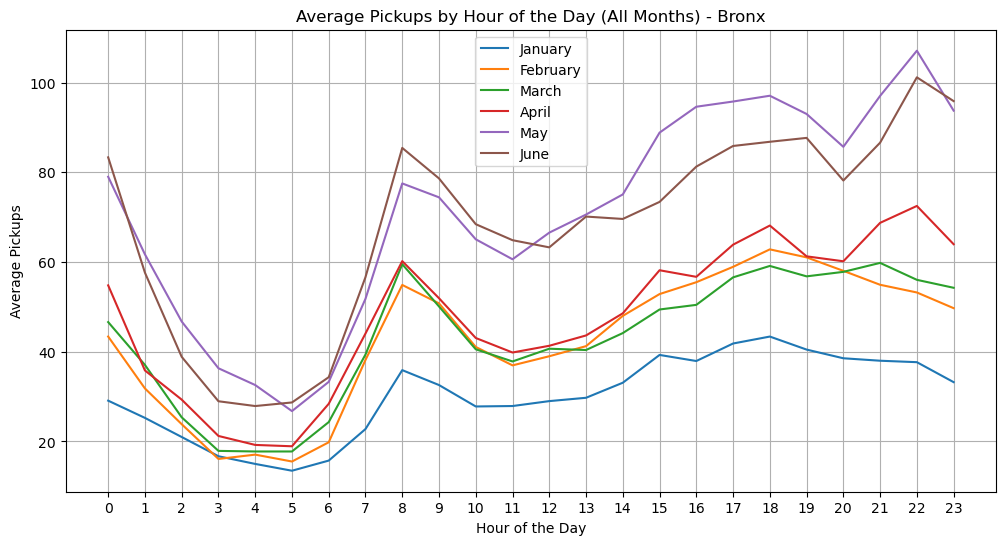

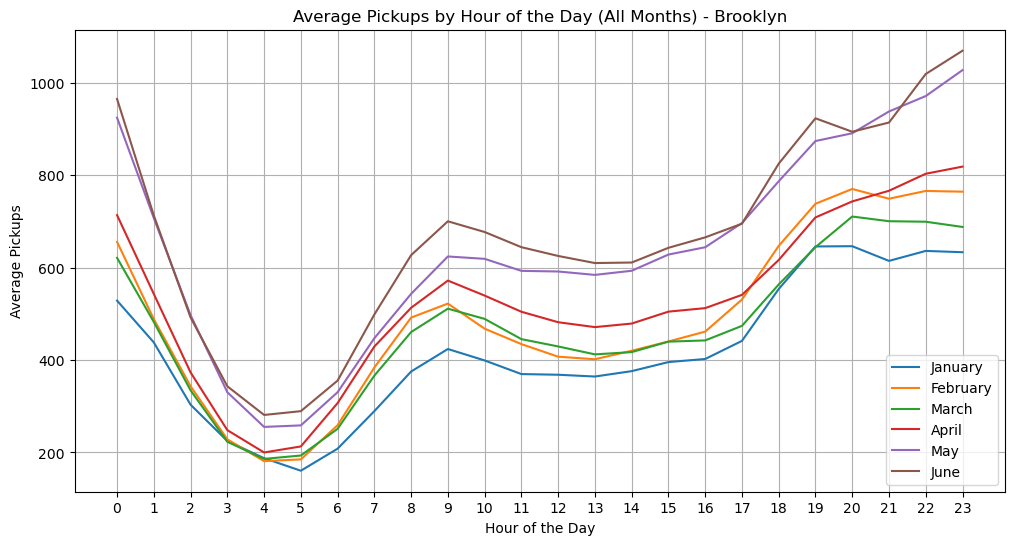

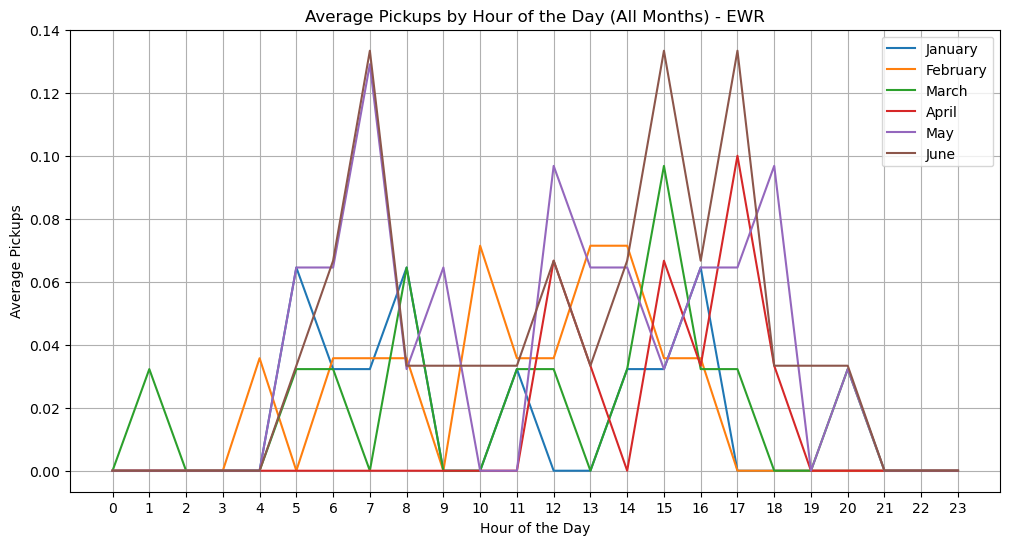

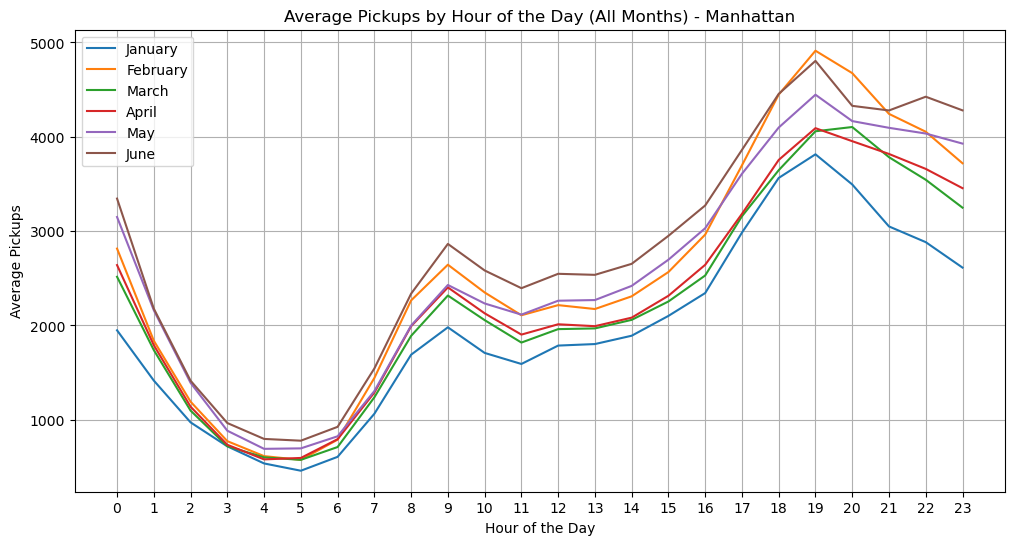

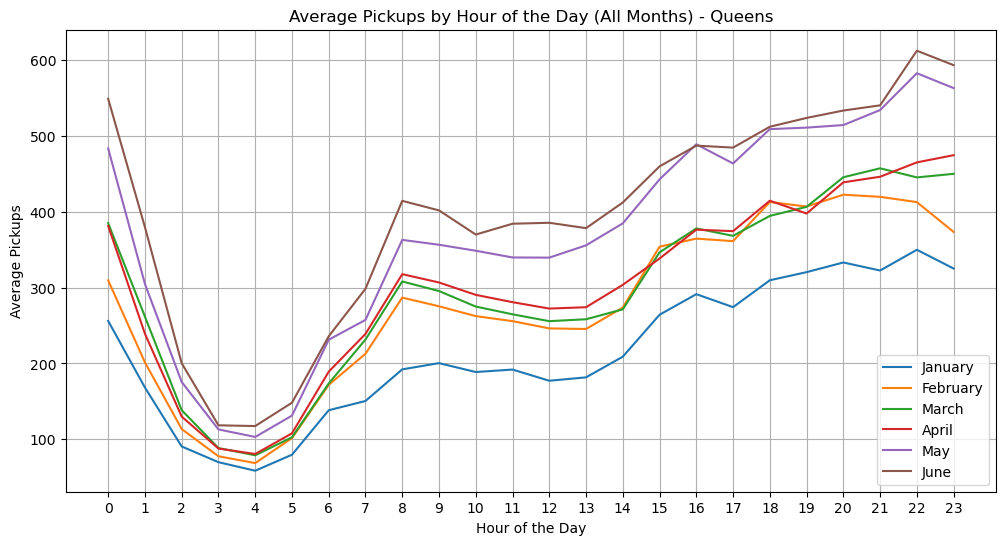

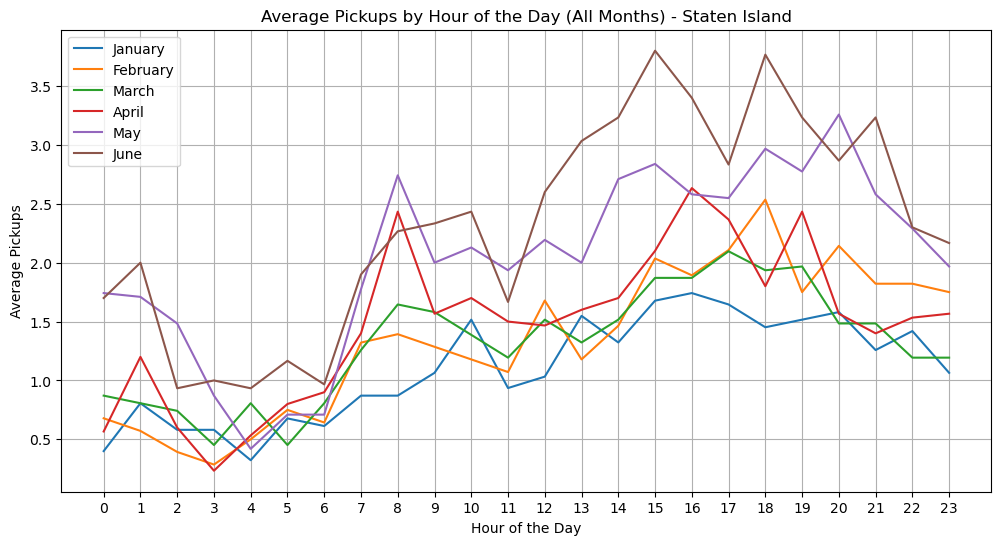

In [18]:
# Create lists of boroughs and months
boroughs = df['borough'].unique()
months = df['month'].unique()

# Plot pickup patterns for each borough and each month separately
for borough in boroughs:
    plt.figure(figsize=(12, 6))
    each_borough_data = borough_data[borough]
    
    for month in months:
        each_borough_month_data = each_borough_data[month]
        plt.plot(each_borough_month_data.index, each_borough_month_data, label=f'{month}')

    plt.title(f'Average Pickups by Hour of the Day (All Months) - {borough}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Pickups')
    plt.grid(True)
    plt.xticks(range(24))
    plt.legend(loc="best")
    plt.show()